# CNN による特徴抽出 + SVM による分類
流れは以下のとおり：
1. 最終層にて softmax + negative log likelihood loss にて評価しつつ，CNN を走らせる。
1. 学習済みのCNNモデルを保存する。
1. CNNモデルを読み込み，学習データを与えて特徴量を求める。
1. Grid Search を用いて，SVC のパラメータ最適化を行う。
1. 最適化されたパラメータ値を用いてテストデータを分類する。

(メモ) 本ノートブックでケアできていない点は以下のとおり：
- CNN モデルの最適化（例えば early stopping により損失最小のCNNモデルを保存する）
- SVM のパラメータ集合のサイズが小さい

---
## MNIST を対象として適当な CNN を走らせる
以下のコードは，次のサイトからパクったものである。  
https://qiita.com/takawamoto/items/42ff569be496621fc016

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#ネットワーク構造の定義
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(12*12*64,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):
        x = self.conv1(x)
        x = f.relu(x)
        x = self.conv2(x)
        x = f.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1,12*12*64)
        x = self.fc1(x)
        x = f.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        return x, f.log_softmax(x, dim=1)

cuda
MyNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Train start
Training: 1 epoch. 100 iteration. Loss: 0.9860961437225342
Training: 1 epoch. 200 iteration. Loss: 1.3245478868484497
Training: 1 epoch. 300 iteration. Loss: 1.4507863521575928
Training: 1 epoch. 400 iteration. Loss: 1.5782066583633423
Training: 1 epoch. 500 iteration. Loss: 1.3204110860824585
Training: 1 epoch. 600 iteration. Loss: 1.5830055475234985
Training: 1 epoch. 700 iteration. Loss: 1.0446257591247559
Training: 1 epoch. 800 iteration. Loss: 1.2005428075790405
Training: 1 epoch. 900 iteration. Loss: 1.0245047807693481
Training: 1 epoch. 

Training: 4 epoch. 1400 iteration. Loss: 1.2751988172531128
Training: 4 epoch. 1500 iteration. Loss: 0.8559070825576782
Training: 4 epoch. 1600 iteration. Loss: 1.3100463151931763
Training: 4 epoch. 1700 iteration. Loss: 1.4364336729049683
Training: 4 epoch. 1800 iteration. Loss: 1.439193606376648
Training: 4 epoch. 1900 iteration. Loss: 1.2894011735916138
Training: 4 epoch. 2000 iteration. Loss: 1.440033197402954
Training: 4 epoch. 2100 iteration. Loss: 1.138810396194458
Training: 4 epoch. 2200 iteration. Loss: 0.707850456237793
Training: 4 epoch. 2300 iteration. Loss: 1.1457116603851318
Training: 4 epoch. 2400 iteration. Loss: 1.0316787958145142
Training: 4 epoch. 2500 iteration. Loss: 1.4759478569030762
Training: 4 epoch. 2600 iteration. Loss: 0.9990009069442749
Training: 4 epoch. 2700 iteration. Loss: 0.5683724284172058
Training: 4 epoch. 2800 iteration. Loss: 1.0384012460708618
Training: 4 epoch. 2900 iteration. Loss: 1.7201122045516968
Training: 4 epoch. 3000 iteration. Loss: 1.0

Training: 7 epoch. 3400 iteration. Loss: 1.283125400543213
Training: 7 epoch. 3500 iteration. Loss: 1.445825457572937
Training: 7 epoch. 3600 iteration. Loss: 1.1904295682907104
Training: 7 epoch. 3700 iteration. Loss: 1.2970472574234009
Training loss (ave.): 1.156145655854543

Validation start
Validation loss: 0.04616776977665722, Accuracy: 0.989


Train start
Training: 8 epoch. 100 iteration. Loss: 1.4646931886672974
Training: 8 epoch. 200 iteration. Loss: 1.150313138961792
Training: 8 epoch. 300 iteration. Loss: 0.6827976703643799
Training: 8 epoch. 400 iteration. Loss: 1.1377274990081787
Training: 8 epoch. 500 iteration. Loss: 1.5920052528381348
Training: 8 epoch. 600 iteration. Loss: 1.149519920349121
Training: 8 epoch. 700 iteration. Loss: 1.002618432044983
Training: 8 epoch. 800 iteration. Loss: 1.2829258441925049
Training: 8 epoch. 900 iteration. Loss: 0.7160828113555908
Training: 8 epoch. 1000 iteration. Loss: 1.0016076564788818
Training: 8 epoch. 1100 iteration. Loss: 2.01172

Training: 11 epoch. 1500 iteration. Loss: 1.2969211339950562
Training: 11 epoch. 1600 iteration. Loss: 1.1720370054244995
Training: 11 epoch. 1700 iteration. Loss: 1.2892135381698608
Training: 11 epoch. 1800 iteration. Loss: 1.7398076057434082
Training: 11 epoch. 1900 iteration. Loss: 0.9810646772384644
Training: 11 epoch. 2000 iteration. Loss: 1.2824382781982422
Training: 11 epoch. 2100 iteration. Loss: 1.1658049821853638
Training: 11 epoch. 2200 iteration. Loss: 1.2943907976150513
Training: 11 epoch. 2300 iteration. Loss: 1.154538869857788
Training: 11 epoch. 2400 iteration. Loss: 0.8846167325973511
Training: 11 epoch. 2500 iteration. Loss: 1.0050458908081055
Training: 11 epoch. 2600 iteration. Loss: 0.4301952123641968
Training: 11 epoch. 2700 iteration. Loss: 1.5876471996307373
Training: 11 epoch. 2800 iteration. Loss: 0.7190506458282471
Training: 11 epoch. 2900 iteration. Loss: 1.2946672439575195
Training: 11 epoch. 3000 iteration. Loss: 1.2973052263259888
Training: 11 epoch. 3100 

Training: 14 epoch. 3300 iteration. Loss: 1.0033739805221558
Training: 14 epoch. 3400 iteration. Loss: 0.8741610646247864
Training: 14 epoch. 3500 iteration. Loss: 1.732736349105835
Training: 14 epoch. 3600 iteration. Loss: 0.5811918377876282
Training: 14 epoch. 3700 iteration. Loss: 1.0238748788833618
Training loss (ave.): 1.163176219391823

Validation start
Validation loss: 0.03852062488661613, Accuracy: 0.9881


Train start
Training: 15 epoch. 100 iteration. Loss: 1.284419059753418
Training: 15 epoch. 200 iteration. Loss: 0.9916567206382751
Training: 15 epoch. 300 iteration. Loss: 0.720686137676239
Training: 15 epoch. 400 iteration. Loss: 0.8487247228622437
Training: 15 epoch. 500 iteration. Loss: 1.2901617288589478
Training: 15 epoch. 600 iteration. Loss: 0.8702069520950317
Training: 15 epoch. 700 iteration. Loss: 1.3001123666763306
Training: 15 epoch. 800 iteration. Loss: 0.9916138052940369
Training: 15 epoch. 900 iteration. Loss: 1.1587681770324707
Training: 15 epoch. 1000 iterat

Training: 18 epoch. 1300 iteration. Loss: 1.0423097610473633
Training: 18 epoch. 1400 iteration. Loss: 0.8735753297805786
Training: 18 epoch. 1500 iteration. Loss: 1.01124906539917
Training: 18 epoch. 1600 iteration. Loss: 0.8662155866622925
Training: 18 epoch. 1700 iteration. Loss: 0.8517535328865051
Training: 18 epoch. 1800 iteration. Loss: 0.8743498921394348
Training: 18 epoch. 1900 iteration. Loss: 1.2803850173950195
Training: 18 epoch. 2000 iteration. Loss: 1.3041647672653198
Training: 18 epoch. 2100 iteration. Loss: 1.5853333473205566
Training: 18 epoch. 2200 iteration. Loss: 1.2969589233398438
Training: 18 epoch. 2300 iteration. Loss: 1.458199143409729
Training: 18 epoch. 2400 iteration. Loss: 1.4305802583694458
Training: 18 epoch. 2500 iteration. Loss: 1.1553086042404175
Training: 18 epoch. 2600 iteration. Loss: 1.1495518684387207
Training: 18 epoch. 2700 iteration. Loss: 1.1370322704315186
Training: 18 epoch. 2800 iteration. Loss: 1.449079990386963
Training: 18 epoch. 2900 ite

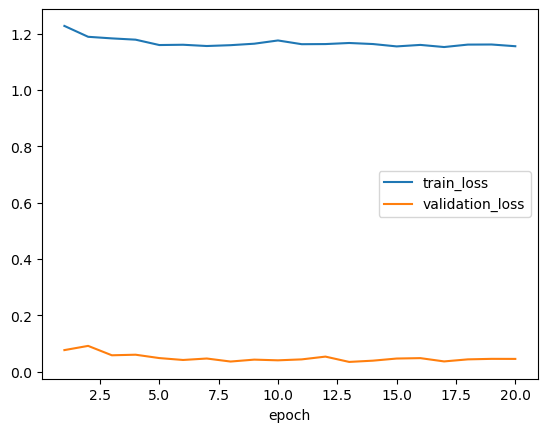

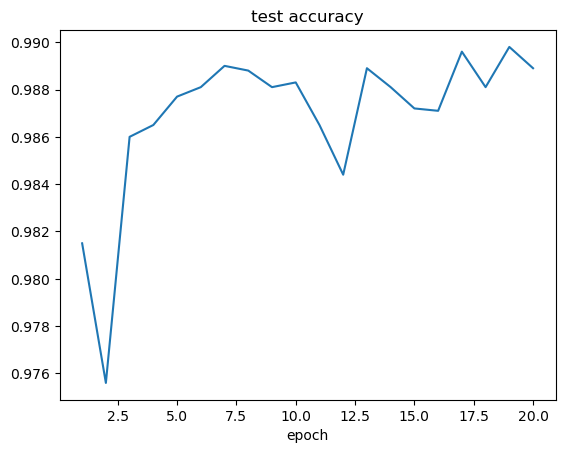

In [5]:
#MNISTデータセットのロード
def load_MNIST(batch=128):
    transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))])

    train_set = torchvision.datasets.MNIST(root="./data",
                                           train=True,
                                           download=True,
                                           transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set,
                                               batch_size=batch,
                                               shuffle=True,
                                               num_workers=2)

    val_set = torchvision.datasets.MNIST(root="./data",
                                         train=False,
                                         download=True,
                                         transform=transform)
    val_loader =torch.utils.data.DataLoader(val_set,
                                            batch_size=batch,
                                            shuffle=True,
                                            num_workers=2)

    return {"train":train_loader, "validation":val_loader}

#エポック数
epoch = 20
batch_size = 16 # 64

#学習結果の保存
history = {
    "train_loss": [],
    "validation_loss": [],
    "validation_acc": []
}

#データのロード
data_loder = load_MNIST(batch=batch_size)

#GPUが使えるときは使う
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#ネットワーク構造の構築
net = MyNet().to(device)
print(net)

#最適化方法の設定
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

for e in range(epoch):
    """ 学習部分 """
    loss = None
    train_loss = 0.0
    net.train() #学習モード
    print("\nTrain start")
    for i,(data,target) in enumerate(data_loder["train"]):
        data,target = data.to(device),target.to(device)

        #勾配の初期化
        optimizer.zero_grad()
        #順伝搬 -> 逆伝搬 -> 最適化
        _, output = net(data)
        loss = f.nll_loss(output,target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print("Training: {} epoch. {} iteration. Loss: {}".format(e+1,i+1,loss.item()))

    train_loss /= len(data_loder["train"])
    print("Training loss (ave.): {}".format(train_loss))
    history["train_loss"].append(train_loss)


    """検証部分"""
    print("\nValidation start")
    net.eval() #検証モード(Validation)
    val_loss = 0.0
    accuracy = 0.0

    with torch.no_grad():
        for data,target in data_loder["validation"]:
            data,target = data.to(device),target.to(device)

            #順伝搬の計算
            _, output = net(data)
            loss = f.nll_loss(output,target).item()
            val_loss += f.nll_loss(output,target,reduction='sum').item()
            predict = output.argmax(dim=1,keepdim=True)
            accuracy += predict.eq(target.view_as(predict)).sum().item()

    val_loss /= len(data_loder["validation"].dataset)
    accuracy /= len(data_loder["validation"].dataset)

    print("Validation loss: {}, Accuracy: {}\n".format(val_loss,accuracy))

    history["validation_loss"].append(val_loss)
    history["validation_acc"].append(accuracy)

PATH = "./my_mnist_model.pt"
torch.save(net.state_dict(), PATH)

#結果
print(history)
plt.figure()
plt.plot(range(1, epoch+1), history["train_loss"], label="train_loss")
plt.plot(range(1, epoch+1), history["validation_loss"], label="validation_loss")
plt.xlabel("epoch")
plt.legend()
plt.savefig("loss.png")

plt.figure()
plt.plot(range(1, epoch+1), history["validation_acc"])
plt.title("test accuracy")
plt.xlabel("epoch")
plt.savefig("test_acc.png")

#if __name__ == "__main__":
#    main()

---
## 特徴抽出 + SVM

In [38]:
# Dataset の定義
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.MNIST(root="./data",
                                       train=True,
                                       download=True,
                                       transform=transform)

val_set = torchvision.datasets.MNIST(root="./data",
                                     train=False,
                                     download=True,
                                     transform=transform)
print(len(train_set))
print(len(val_set))


60000
10000


In [4]:
# モデルの読み込み
model = MyNet()
model.load_state_dict(torch.load("./my_mnist_model.pt"))

<All keys matched successfully>

In [43]:
# 学習データをモデルに通して，特徴量を取り出す
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=16, #len(train_set),
                                           shuffle=True,
                                           num_workers=2)

model = model.to('cpu')

model.eval() #検証モード(Validation)

import numpy as np
features = [] # np.empty([16,10])#(16, 10))
targets = []

with torch.no_grad():
    for data,target in train_loader:
        # print("AAA")
        # data,target = data.to(device),target.to(device)

        #順伝搬の計算
        embed, _ = model(data)
        # print(embed.shape)
        
        features.append(embed.detach().numpy())
        targets.append(target.detach().numpy())
        
X_train = np.array(features).reshape((-1,10))
y_train = np.array(targets).reshape(-1)

/home/muto/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [44]:
print(X_train.shape)
print(y_train.shape)

(60000, 10)
(60000,)


### SVC のパラメータ最適化
(メモ) SVC の gamma を 'auto' に設定すると，随分と時間を要する。

In [53]:
# SVC のパラメータ最適化
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = SVC(kernel='rbf')

parameters = {
    "C": [0.5, 1.0, 1.5],
    "gamma" : ('scale', 'auto')
}

# ハイパーパラメータチューニング(グリッドサーチのコンストラクタにモデルと辞書パラメータを指定)
gridsearch = GridSearchCV(estimator=clf,        # モデル
                          param_grid=parameters,  # チューニングするハイパーパラメータ
                          scoring="accuracy",      # スコアリング
                          cv=5,
                          verbose=2
                         )

# Grid Search の実行
gridsearch.fit(X_train, y_train)

# Grid Search の結果から得られた最適なパラメータ候補を出力
print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................C=0.5, gamma=scale; total time=   2.3s
[CV] END .................................C=0.5, gamma=scale; total time=   2.4s
[CV] END .................................C=0.5, gamma=scale; total time=   2.3s
[CV] END .................................C=0.5, gamma=scale; total time=   2.3s
[CV] END .................................C=0.5, gamma=scale; total time=   2.3s
[CV] END ..................................C=0.5, gamma=auto; total time= 3.1min
[CV] END ..................................C=0.5, gamma=auto; total time= 3.2min
[CV] END ..................................C=0.5, gamma=auto; total time= 3.2min
[CV] END ..................................C=0.5, gamma=auto; total time= 3.1min
[CV] END ..................................C=0.5, gamma=auto; total time= 3.1min
[CV] END .................................C=1.0, gamma=scale; total time=   1.8s
[CV] END .................................C=1.0, 

### 最適化されたパラメータに基づく SVC の学習

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf', C=0.5, gamma='scale')

clf.fit(X_train, y_train)
# scores = cross_val_score(clf, X_train, y_train, cv=5)
# scores

SVC(C=0.5)

In [55]:
# テスト
val_loader = torch.utils.data.DataLoader(val_set,
                                           batch_size=len(val_set),
                                           shuffle=True,
                                           num_workers=2)

model = model.to('cpu')

model.eval() #検証モード(Validation)

import numpy as np
features = [] # np.empty([16,10])#(16, 10))
targets = []

with torch.no_grad():
    for data,target in val_loader:
        
        # print("AAA")
        # data,target = data.to(device),target.to(device)

        #順伝搬の計算
        embed, _ = model(data)
        # print(embed.shape)
        
        features.append(embed.detach().numpy())
        targets.append(target.detach().numpy())
        
X_test = np.array(features).reshape((-1,10))
y_test = np.array(targets).reshape(-1)

clf.score(X_test, y_test)

/home/muto/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


0.9913